Group Number: 9

Team Members:
1.Shrunkhala Rajesh Choukade
2.Savanna de la Paz
3.Deepak Singh


   **United State of America's Gun Culture**

Over the course of the last several decades, gun violence has been responsible for the loss of so many lives in the United States. Numerous people have been hurt both physically and emotionally as a direct result of various types of gun violence, including but not limited to mass shootings, armed robberies, and gun-related suicides. This has been the leading cause of mortality.

 In light of all this, statistics are being gathered in an effort to gain a better understanding of the nature of the gun culture in the United States. The data may be analyzed, and then insights, forecasts, and trends can be taken from the data to aid in gaining an understanding of how to control the incidents of gun violence.

Gun regulation is a well-known and frequently debated contentious subject that has been in the news for many years. There have been several discussions over whether or not the United States should implement stricter gun control laws, especially in light of the recent increase in gun violence.

The United States currently owns approximately 120.5 firearms per 100 people, which is the highest per capita rate globally. About 32% of adults in the U.S. own at least one firearm, while 11% live in a household with someone who possesses a firearm. On average, 100 Americans are shot and killed with firearms daily, with many more sustaining injuries. Additionally, there is a significant number of individuals affected by witnessing gun violence and experiencing psychological harm.


Recent data indicates that in the United States, approximately 27,000 of the 50,000 suicides in 2022 were carried out by guns, marking a significant increase compared to previous years. Gun suicides claim the lives of nearly 25,000 people in America annually, highlighting the urgent need to address this public health crisis and reduce gun violence in the country. Gun violence conversations often focus on homicides, but nearly six out of every 10 gun deaths in the U.S. are suicides.



***This research will examine the many shooting occurrences that have happened in the United States and the evolution of gun sales. This study's primary objective is to examine the U.S. gun culture and how it has influenced millions of individuals over the years***

> ##### Resource Questions:-

Below are the questions that the research will be focused on answering.

1. How have the sales of firearms evolved?

2. Where do the most firearms purchases occur?

3. Is there a relationship between the number of guns owned by citizens and the number and location of shooting incidents?

4. Can we predict the likelihood of increased gun sales in a region based on historical sales data, demographic factors, and recent incidents of gun violence?

> ##### Data Source

1. https://data.world/angatiabenson1/nics-firearm-check

This dataset is presented as a comma-separated values (CSV) file, and it provides information on the various types of firearms and the permits required to possess them in each of the fifty states that make up the United States.

Cleaning: The CSV file was already cleaned so we did not took further actions


2. https://www.gunviolencearchive.org

Data about gun-related violence in the United States is made available to the general public through a website run by a non-profit group called the Gun Violence Archive (GVA). There is a complete record of every single instance of gun violence that took occurred between the years of 2014 and 2022. 

We extracted the file : US_Mass_shooting_data_2014_2023_updated.xlsx from above website using MySQL Workbench which offers a user-friendly Import/Export Wizard which had simplified the process of exporting databases or tables into various formats, including JSON and CSV.
We have already submitted the code on how we  downloaded the file in DDR project

Cleaning: The file was already cleaned and we just updated date into proper formated



For analysis purpose we have aggregated the both files to answer questions

1. **How have the sales of firearms evolved?**

In [24]:
import pandas as pd

# Load the data from both files
mass_shootings_data = pd.read_excel('/Users/shrunkhala/Downloads/US_Mass_shooting_data_2014_2023_updated.xlsx')
nics_data = pd.read_csv('/Users/shrunkhala/Downloads/nics.csv')

# Display the first few rows of each dataset to understand their structures
mass_shootings_data.head(), nics_data.head()


(  incident_date           state          city                  address  \
 0    2023-12-31      California     Hawthorne      14125 Crenshaw Blvd   
 1    2023-12-31  South Carolina  Little River             3389 Hwy 9 E   
 2    2023-12-31  North Carolina     Charlotte          300 S Church St   
 3    2023-12-30        Colorado        Denver        4888 W Colfax Ave   
 4    2023-12-30           Texas      Beaumont  6500 block of Bigner Rd   
 
    victims_killed  victims_injured  suspects_killed  suspects_injured  \
 0               1                5                0                 0   
 1               2                2                0                 0   
 2               0                5                0                 0   
 3               2                2                0                 0   
 4               1                4                0                 0   
 
    suspects_arrested  
 0                  0  
 1                  0  
 2                  1  
 3    

In [25]:
# We converted 'month' in NICS data to datetime format for easier handling
nics_data['month'] = pd.to_datetime(nics_data['month'])

# Aggregate total sales per month (the 'totals' column already sums all transactions)
monthly_sales = nics_data.groupby('month')['totals'].sum().reset_index()

# Display the aggregated monthly sales
monthly_sales.head()


,month,totals
0,1998-11-01,21176
1,1998-12-01,870722
2,1999-01-01,585974
3,1999-02-01,690215
4,1999-03-01,741687


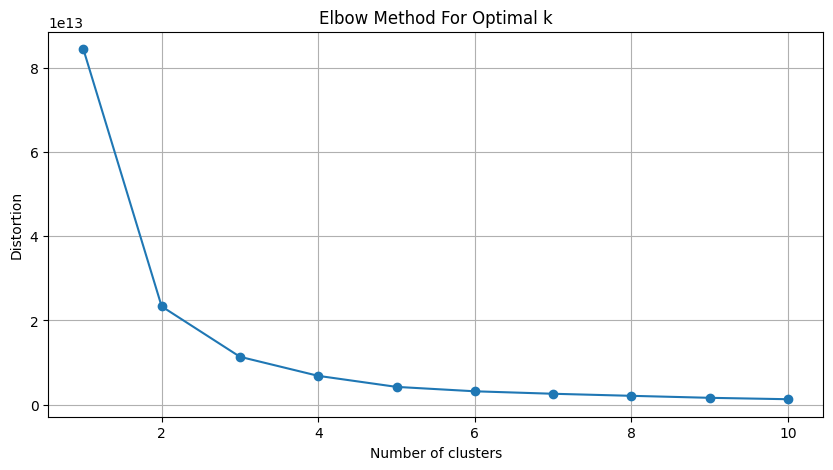

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Optimal number of clusters using the Elbow method
# Extract the total sales values for clustering
sales_values = monthly_sales['totals'].values.reshape(-1, 1)

# Calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(sales_values)
    distortions.append(km.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


The Elbow Method graph indicates how the total distortion (or inertia) decreases as the number of clusters increases. Typically, we look for the "elbow" point where the rate of decrease sharply changes, as this represents a balance between the number of clusters and the variance within each cluster.

In our graph, there's a noticeable elbow around 3 to 4 clusters. Choosing either could be reasonable, but for a clearer distinction in the data, I'll use 3 clusters for our analysis. Now, I'll proceed by applying K-means clustering with 3 clusters to the monthly sales data and analyze the results to understand how the sales of firearms have evolved.

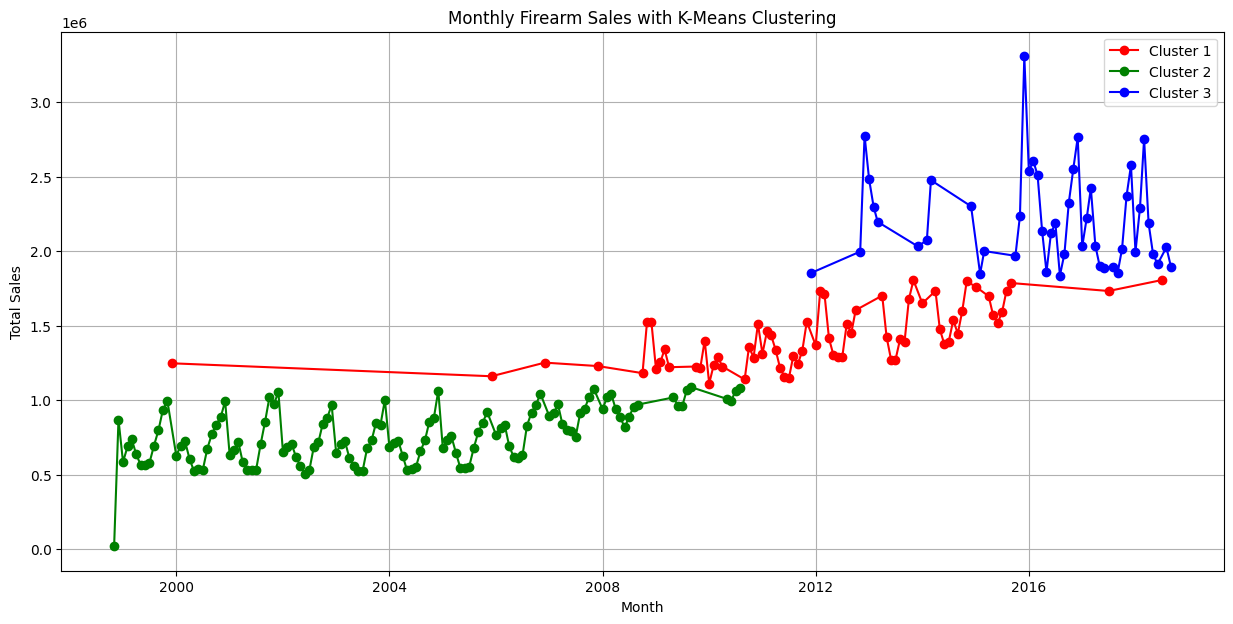

In [27]:
# Apply K-means clustering with 3 clusters
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
monthly_sales['cluster'] = km.fit_predict(sales_values)

# Sort months by cluster for a clearer chronological trend
clustered_sales = monthly_sales.sort_values(['cluster', 'month'])

# Plot the monthly sales with color coding for clusters
plt.figure(figsize=(15, 7))
colors = ['red', 'green', 'blue']
for cluster in range(3):
    cluster_data = clustered_sales[clustered_sales['cluster'] == cluster]
    plt.plot(cluster_data['month'], cluster_data['totals'], marker='o', linestyle='-', color=colors[cluster], label=f'Cluster {cluster + 1}')

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Firearm Sales with K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


The graph shows the monthly firearm sales categorized into three clusters, each represented by different colors (red, green, blue).

Cluster 1 (Red) might represent periods with relatively lower firearm sales.
Cluster 2 (Green) seems to correspond to intermediate sales levels.
Cluster 3 (Blue) likely denotes periods with the highest sales.
From the distribution, we observe that sales do not follow a straightforward increasing or decreasing trend over time. Instead, there are periods where sales spike significantly, possibly due to specific events or legislative changes, and other times when they decrease or stabilize.

By categorizing the data into these clusters, we can conclude that the sales of firearms have fluctuated significantly over time, with distinct periods of high, medium, and low sales volumes. This clustering gives us a macro view of how firearm sales have evolved, highlighting times of increased public interest or concern, which are often reflected in higher sales. ​

2. **Where do the most firearms purchases occur? (Used simple regression to answer)**

In [1]:
import pandas as pd

# Load the dataset from your local system
nics_data = pd.read_excel('/Users/delapaz/Downloads/nics.xlsx')

# Group the data by 'state' and sum up the 'totals' column
state_totals = nics_data.groupby('state')['totals'].sum().sort_values(ascending=False)

# Print the states with the most firearm purchases
print(state_totals)


state
Kentucky                34658325
Texas                   21061868
California              20395757
Illinois                17903958
Pennsylvania            14182241
Florida                 12953684
Ohio                     9198350
Indiana                  8651586
North Carolina           8321366
Tennessee                8021578
Georgia                  7773445
Michigan                 7755325
Alabama                  7184104
Missouri                 7060523
Washington               6987179
Minnesota                6877208
Colorado                 6602464
Virginia                 6374351
Wisconsin                5597071
Louisiana                5023080
New York                 5006146
Oklahoma                 4916262
Arizona                  4816709
Utah                     4640122
South Carolina           4316385
Oregon                   4115484
Arkansas                 4006498
Mississippi              3830080
West Virginia            3455547
Connecticut              3343459
Kans

These results, extending from November 1998 to September 2018, show the total firearm transactions processed by background checks in each state and territory of the United States. Kentucky significantly leads in the number of transactions, which is much more than other states with large populations such as Texas, California, and Illinois. The differences in total number of transactions by state may be influenced by state specific legislation, cultural attitudes towards gun ownership, or population size. Smaller states like Delaware and Vermont, along with territories like Puerto Rico and Guam, show fewer transactions, possibly as a result of stricter regulatory environments or gun culture in these regions. 

<Figure size 1500x700 with 0 Axes>

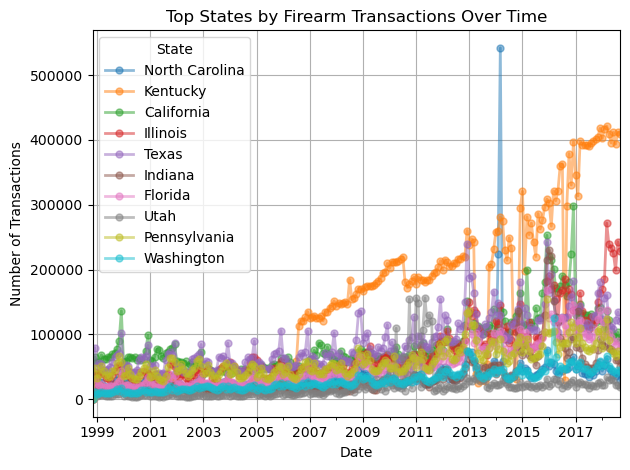

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from Excel
df = pd.read_excel('/Users/delapaz/Downloads/nics.xlsx')

# Convert 'month' column to datetime
df['month'] = pd.to_datetime(df['month'])

# Group the data by 'state' and 'month', summing the transactions for each period
grouped_df = df.groupby(['state', df['month'].dt.to_period('M')])['totals'].sum().reset_index()

# Convert the 'month' from Period to datetime to easily plot it
grouped_df['month'] = grouped_df['month'].dt.to_timestamp()

# Sort the data by 'state' and 'month'
grouped_df.sort_values(by=['state', 'month'], inplace=True)

# Pivot the data to get 'month' on the x-axis and totals for each 'state' as separate columns
pivot_df = grouped_df.pivot(index='month', columns='state', values='totals')

# Plotting
plt.figure(figsize=(15, 7))

# Let's plot the top 10 states with the most transactions for clarity
top_states = pivot_df.max().sort_values(ascending=False).head(10).index
pivot_df[top_states].plot(kind='line', marker='o', linestyle='-', markersize=5, alpha=0.5, linewidth=2)

plt.title('Top States by Firearm Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend(title='State')
plt.grid(True)
plt.tight_layout()
plt.show()


The graph titled "Top States by Firearm Transactions Over Time" visualizes the trends in firearm transactions across different states from November 1998 to September 2018. Each line represents one of the ten top states in terms of firearm transaction volume, and the y-axis indicates the number of transactions.

From the graph, it's clear that some states, like Kentucky, have a notably higher number of transactions compared to others. We can see the spikes in Kentucky's transactions over time, which means there are significant increases in firearm purchases. This could be a result of things such as legislative changes, population growth, or changes in social attitudes towards gun ownership.

The visualization allows us to compare the number of transactions between states and observe how this amount changes over time. States like California, Illinois, and Texas also show a large number of transactions, but the patterns can vary significantly from state to state. Some states show a steady increase, but others have more fluctuations or periods of plateau.

This kind of information is useful for politicians or business stakeholders looking to understand gun commerce dynamics, inform policy, or tailor business strategies to different regions based on the volume of firearm transactions.

3. **Is there a relationship between the number of guns owned by citizens and the number and location of shooting incidents?**

In [3]:
# Import the Necessary Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing,model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Lasso

/var/folders/hz/q90ggcl15xqd3xkspnzw0n9c0000gn/T/ipykernel_4597/4183908291.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [14]:
#Nics data source

file_path = '/Users/shrunkhala/Downloads/nics.csv'
nics_data = pd.read_csv(file_path)

nics_data.head()



,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2018-09,Alabama,19471.0,0.0,4978.0,5832.0,241.0,271,0.0,15.0,...,0.0,0.0,0.0,26.0,24.0,5.0,0.0,0.0,0.0,32706
1,2018-09,Alaska,212.0,5.0,2105.0,2554.0,225.0,165,0.0,0.0,...,0.0,0.0,0.0,16.0,16.0,1.0,0.0,0.0,0.0,5699
2,2018-09,Arizona,9651.0,398.0,10298.0,6638.0,1096.0,654,0.0,19.0,...,0.0,0.0,0.0,21.0,20.0,4.0,0.0,0.0,0.0,30667
3,2018-09,Arkansas,4265.0,472.0,3987.0,5257.0,247.0,320,55.0,18.0,...,0.0,0.0,0.0,19.0,22.0,2.0,1.0,0.0,1.0,17072
4,2018-09,California,34638.0,0.0,29772.0,23788.0,2977.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91975


In [12]:
# Crime data source
import pandas as pd  # Make sure pandas is imported

filepath = '/Users/shrunkhala/Downloads/US_Mass_shooting_data_2014_2023_updated.xlsx'
Crime_data = pd.read_excel(filepath)
Crime_data.head()


,incident_date,state,city,address,victims_killed,victims_injured,suspects_killed,suspects_injured,suspects_arrested
0,2023-12-31,California,Hawthorne,14125 Crenshaw Blvd,1,5,0,0,0
1,2023-12-31,South Carolina,Little River,3389 Hwy 9 E,2,2,0,0,0
2,2023-12-31,North Carolina,Charlotte,300 S Church St,0,5,0,0,1
3,2023-12-30,Colorado,Denver,4888 W Colfax Ave,2,2,0,0,0
4,2023-12-30,Texas,Beaumont,6500 block of Bigner Rd,1,4,0,0,0


With all the data in place, we can now begin our explanatory analysis. In this section, we will analyze the entire dataset as well as the significance of the variables.To begin we'll look at the how many cases do we have in each dataset

In [16]:
nics_data.shape


(13145, 27)

In [15]:
Crime_data.shape

(4684, 9)

In our NICS data we have 13145 records with 27 attributes while for the gun related violence dataset we have 4684 records with 9 attributes.Then, we'll get to understand the variables data types

In [17]:
nics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13145 entries, 0 to 13144
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      13145 non-null  object 
 1   state                      13145 non-null  object 
 2   permit                     13121 non-null  float64
 3   permit_recheck             1760 non-null   float64
 4   handgun                    13125 non-null  float64
 5   long_gun                   13126 non-null  float64
 6   other                      6160 non-null   float64
 7   multiple                   13145 non-null  int64  
 8   admin                      13122 non-null  float64
 9   prepawn_handgun            11202 non-null  float64
 10  prepawn_long_gun           11200 non-null  float64
 11  prepawn_other              5775 non-null   float64
 12  redemption_handgun         11205 non-null  float64
 13  redemption_long_gun        11204 non-null  flo

In [18]:
Crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4684 entries, 0 to 4683
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   incident_date      4684 non-null   datetime64[ns]
 1   state              4684 non-null   object        
 2   city               4684 non-null   object        
 3   address            4669 non-null   object        
 4   victims_killed     4684 non-null   int64         
 5   victims_injured    4684 non-null   int64         
 6   suspects_killed    4684 non-null   int64         
 7   suspects_injured   4684 non-null   int64         
 8   suspects_arrested  4684 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 329.5+ KB


We can also do a descriptive statistical analysis on the data to gain more understanding on the variables

To further understand the data we're going to visualize the major attributes of the data as shown below.

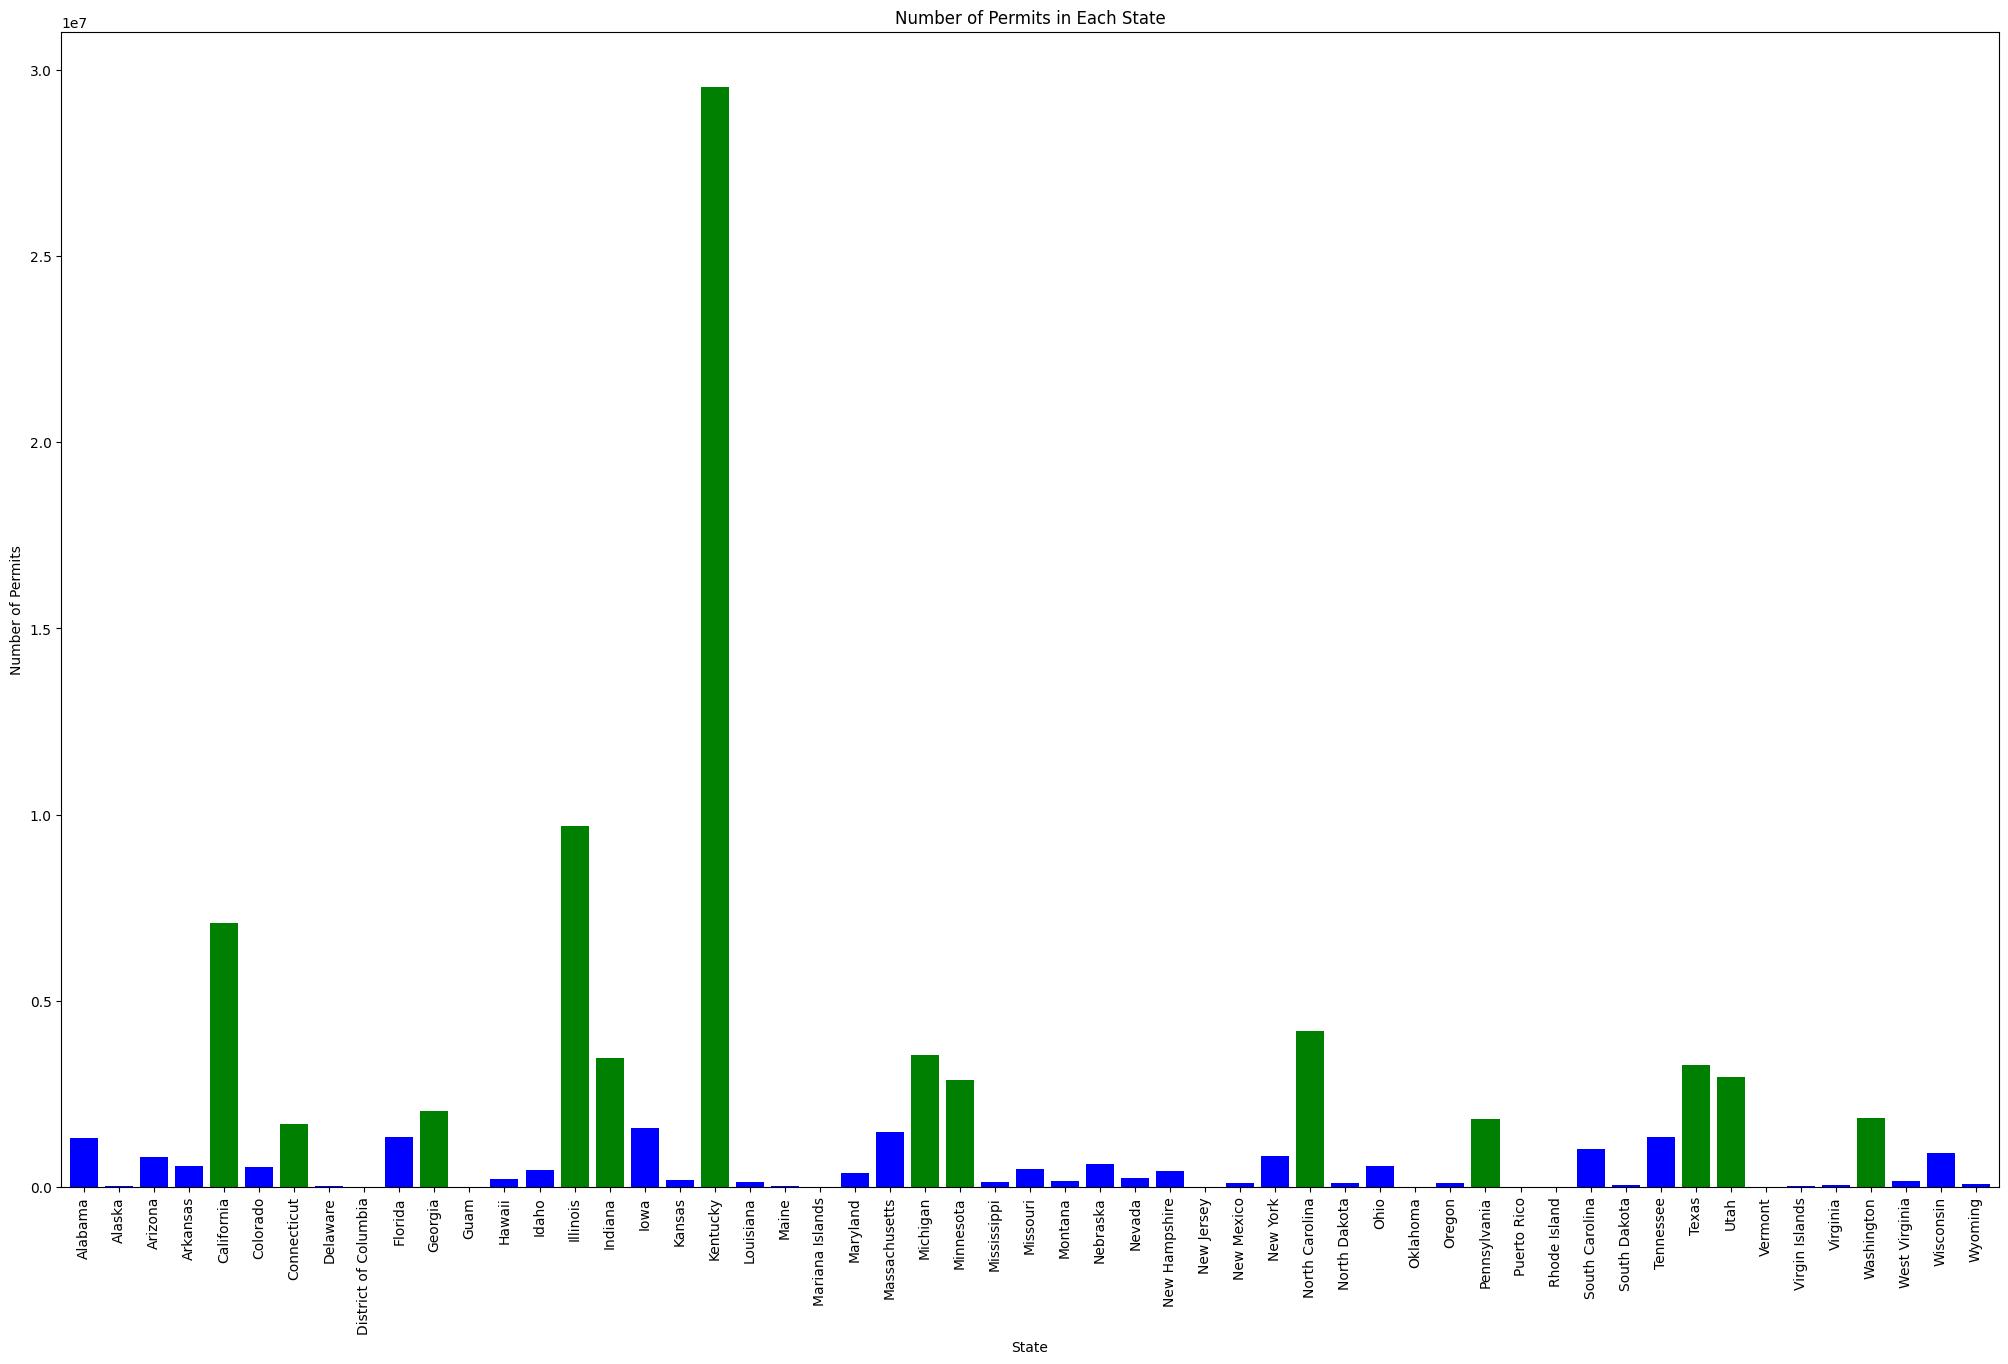

In [22]:


# Calculate the number of permits for each state
permit_data = nics_data.groupby(['state'])['permit'].sum()

# Define a threshold for high permit counts - you can adjust this as needed
high_count_threshold = permit_data.mean()  # For example, using the average as a threshold

# Assign colors based on permit count ('green' for high counts, 'blue' for lower counts)
colors = ['green' if count > high_count_threshold else 'blue' for count in permit_data]

# Create the bar plot with specified bar width and colors
permit_data.plot(kind='bar', title='Number of Permits in Each State', ylabel='Number of Permits',
                 xlabel='State', figsize=(25, 15), width=0.8, color=colors)

# Show the plot
plt.show()


The above bar graph gives us an overview of the number of permits in each state. We can also check on the number of permit rechecks that occured cross the states.The graph highlights that Kentucky, by a substantial margin, leads in the number of firearm permits issued, significantly exceeding the national average, as indicated by its prominent green bar. Other states, like Illinois, also show higher-than-average permit counts but are not as extreme, while the majority of states, represented by blue bars, issue far fewer permits.

<Axes: title={'center': 'Number of permit rechecks in each state'}, xlabel='State', ylabel='Number of Permit Recheck'>

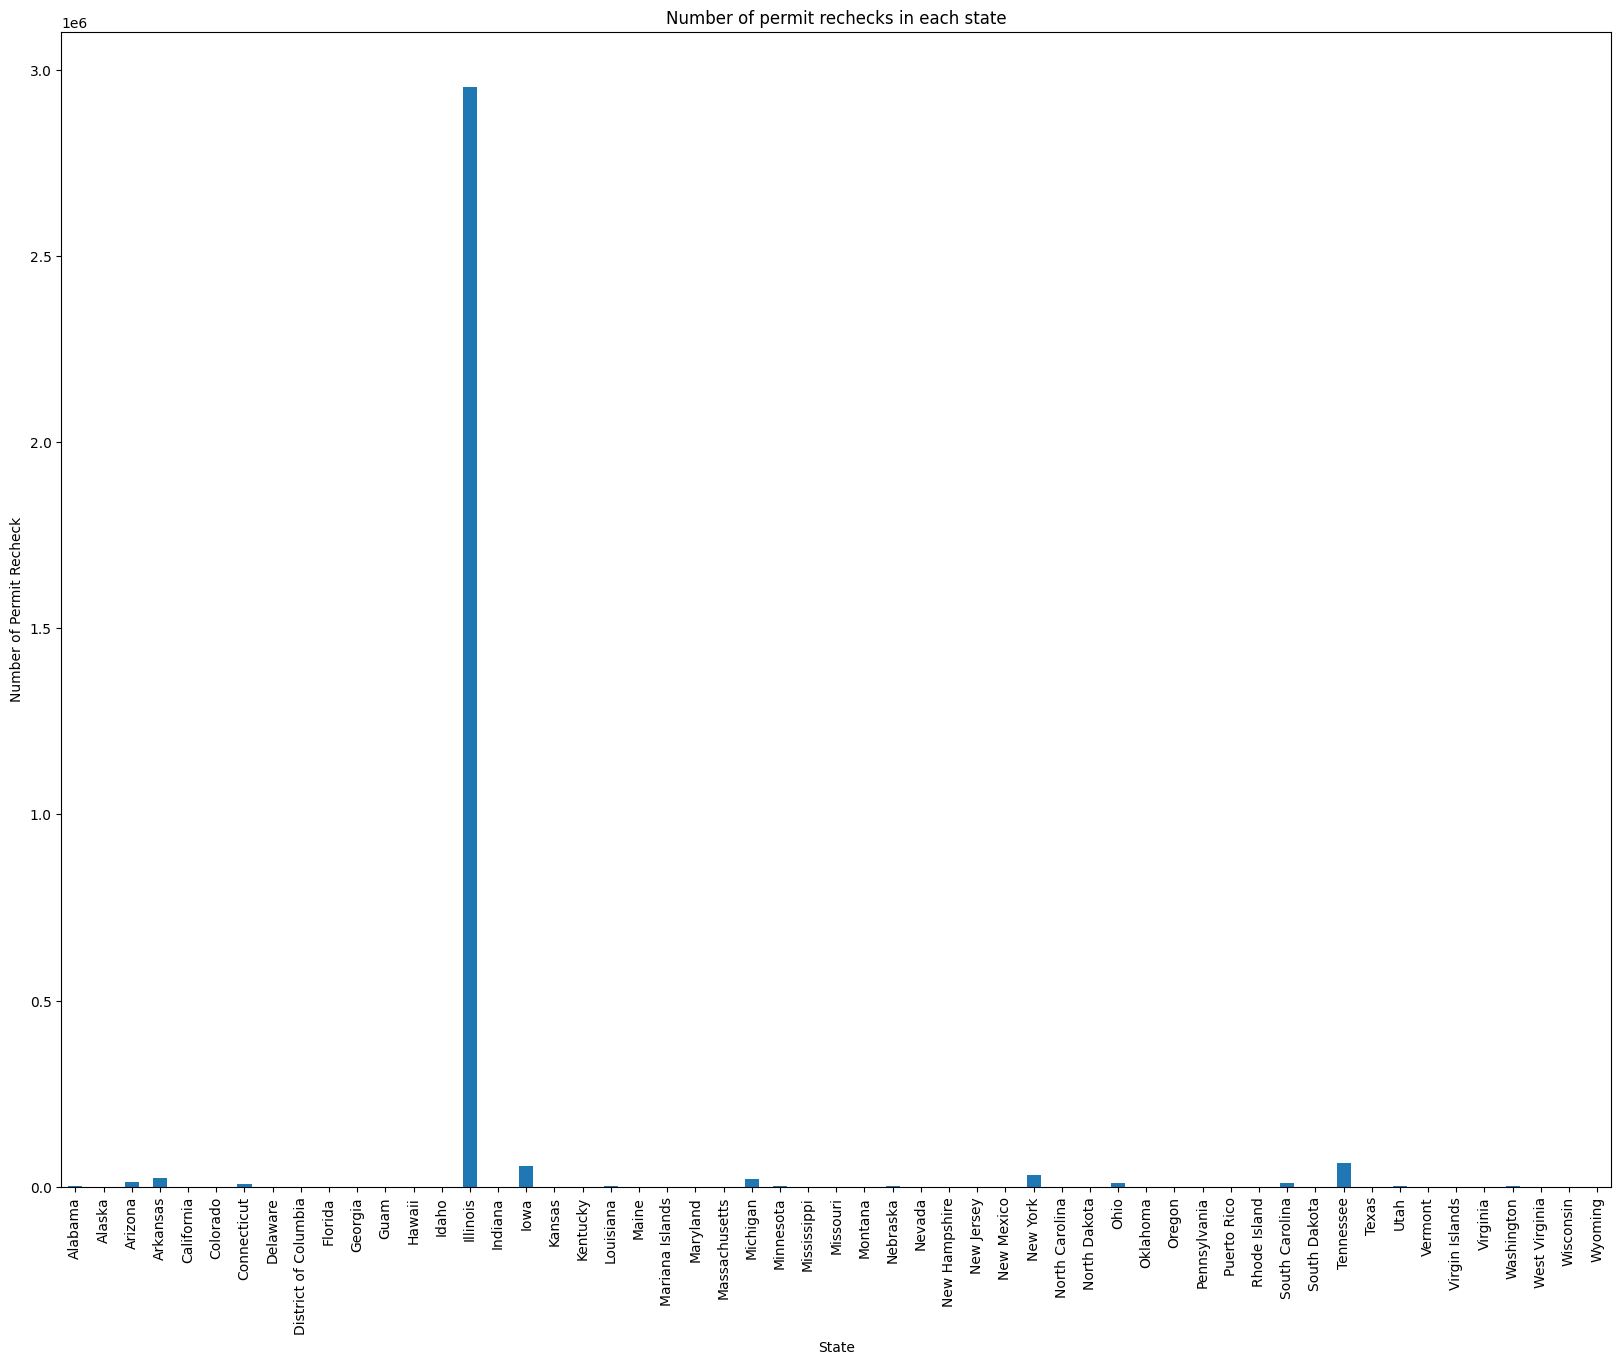

In [25]:
#Filter and group the graph data
permit_data=nics_data.groupby(['state'])['permit_recheck'].sum()
permit_data.plot(kind='bar', title='Number of permit rechecks in each state', ylabel='Number of Permit Recheck', xlabel='State', figsize=(20, 15))

The graph above shows the number of permit rechecks that were done in each state. After looking at the permits we can further explore the total number of guns in each state.
The graph clearly shows that kentucky state exceeds others in the number of firearm permit rechecks, as depicted by the singular towering blue bar. In stark contrast, all other states display significantly fewer permit rechecks, maintaining a much lower and relatively uniform count.

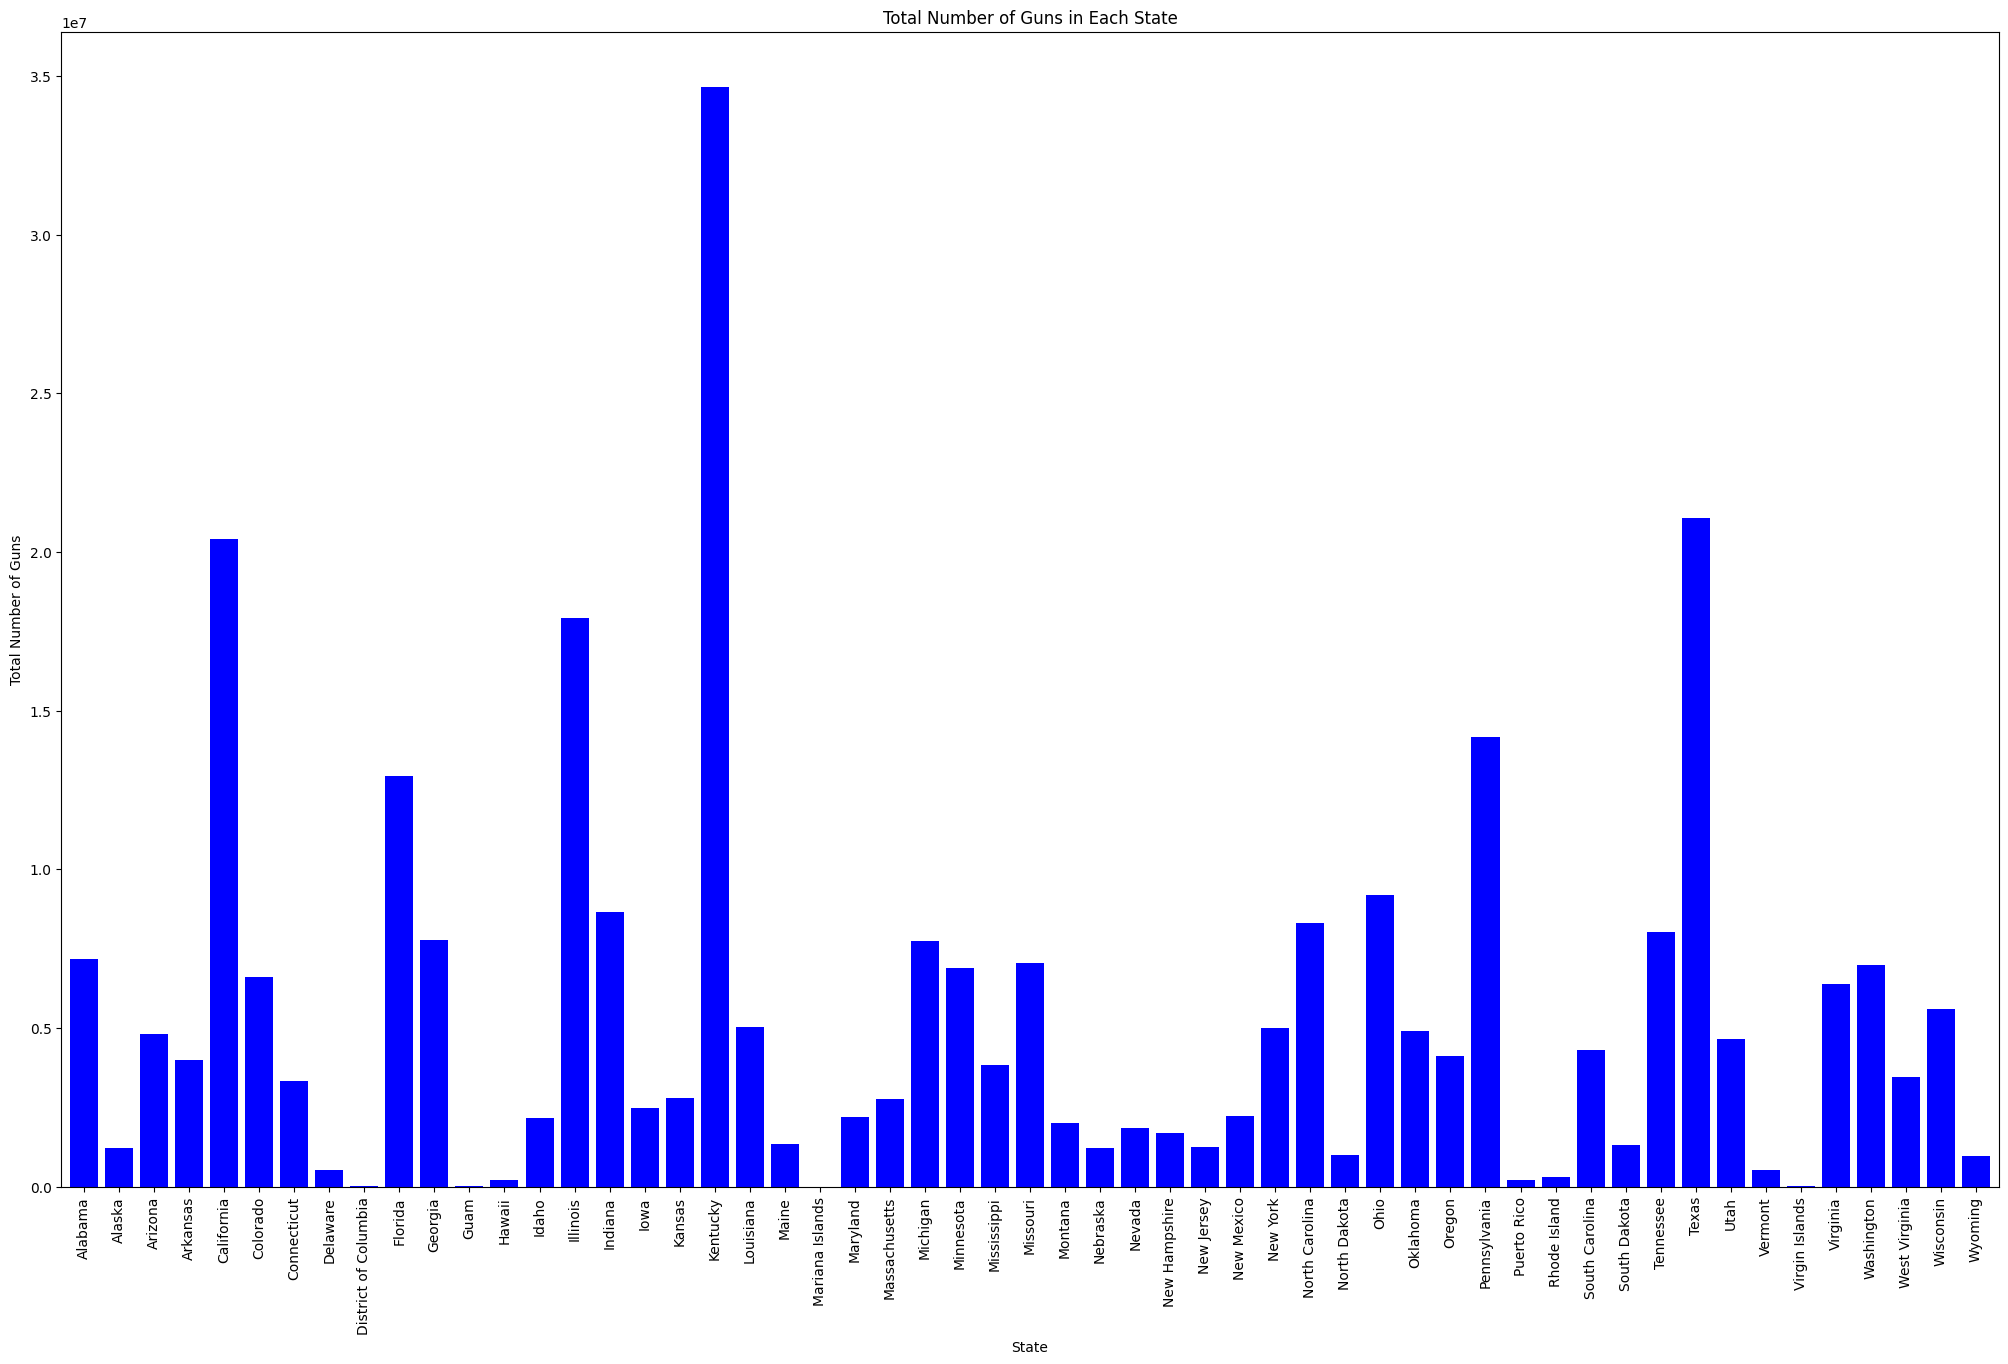

In [27]:
# Filter and group the graph data
permit_data = nics_data.groupby(['state'])['totals'].sum()

# Bar chart
permit_data.plot(kind='bar', title='Total Number of Guns in Each State', ylabel='Total Number of Guns',
                 xlabel='State', figsize=(25, 15), color='blue', width=0.8)  

# Show the plot
plt.show()

The graph illustrates the total number of guns reported in each state. The Kentucky state with the significantly tallest blue bar vastly exceeds others in the total reported number of guns. Other states show much lower totals, with the majority clustering at the lower end of the scale. This indicates a severe contrast in gun ownership or permit issuance between Kentucky and the rest of the states represented in the graph.

From the crime data, we have we can try to explore the data and see if there's a any kind of relationship between the number of killings that occur and the injuries cause due to gun violence.

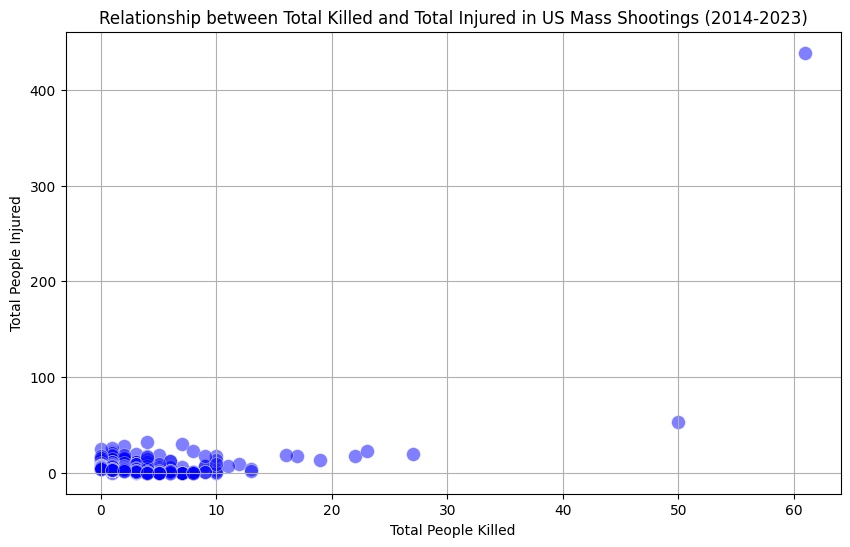

In [35]:
import matplotlib.pyplot as plt

# Creating new columns for total number of people killed and injured
Crime_data['total_killed'] = Crime_data['victims_killed'] + Crime_data['suspects_killed']
Crime_data['total_injured'] = Crime_data['victims_injured'] + Crime_data['suspects_injured']
Crime_data['total_affected'] = Crime_data['total_killed'] + Crime_data['total_injured']

# Scatter plot to visualize the relationship between total killed and total injured
plt.figure(figsize=(10, 6))
plt.scatter(Crime_data['total_killed'], Crime_data['total_injured'], alpha=0.5, c='blue', edgecolors='w', linewidths=0.5, s=100)  # circle markers
plt.title('Relationship between Total Killed and Total Injured in US Mass Shootings (2014-2023)')
plt.xlabel('Total People Killed')
plt.ylabel('Total People Injured')
plt.grid(True)
plt.show()


The scatterplot shows that most US mass shootings between 2014 and 2023 resulted in fewer than 10 deaths and varied numbers of injuries, with a few extreme cases involving significantly higher casualties. The data suggests a lack of a strong linear relationship but indicates that larger incidents, although rare, can result in disproportionately high numbers of injuries.

We can then proceed to look into the number of handguns that are there in each state. This is also a way to undersand more the incidents since most of them are believed to be commited by hand guns

<Axes: title={'center': 'Number of handguns in each state'}, xlabel='State', ylabel='Number of handguns'>

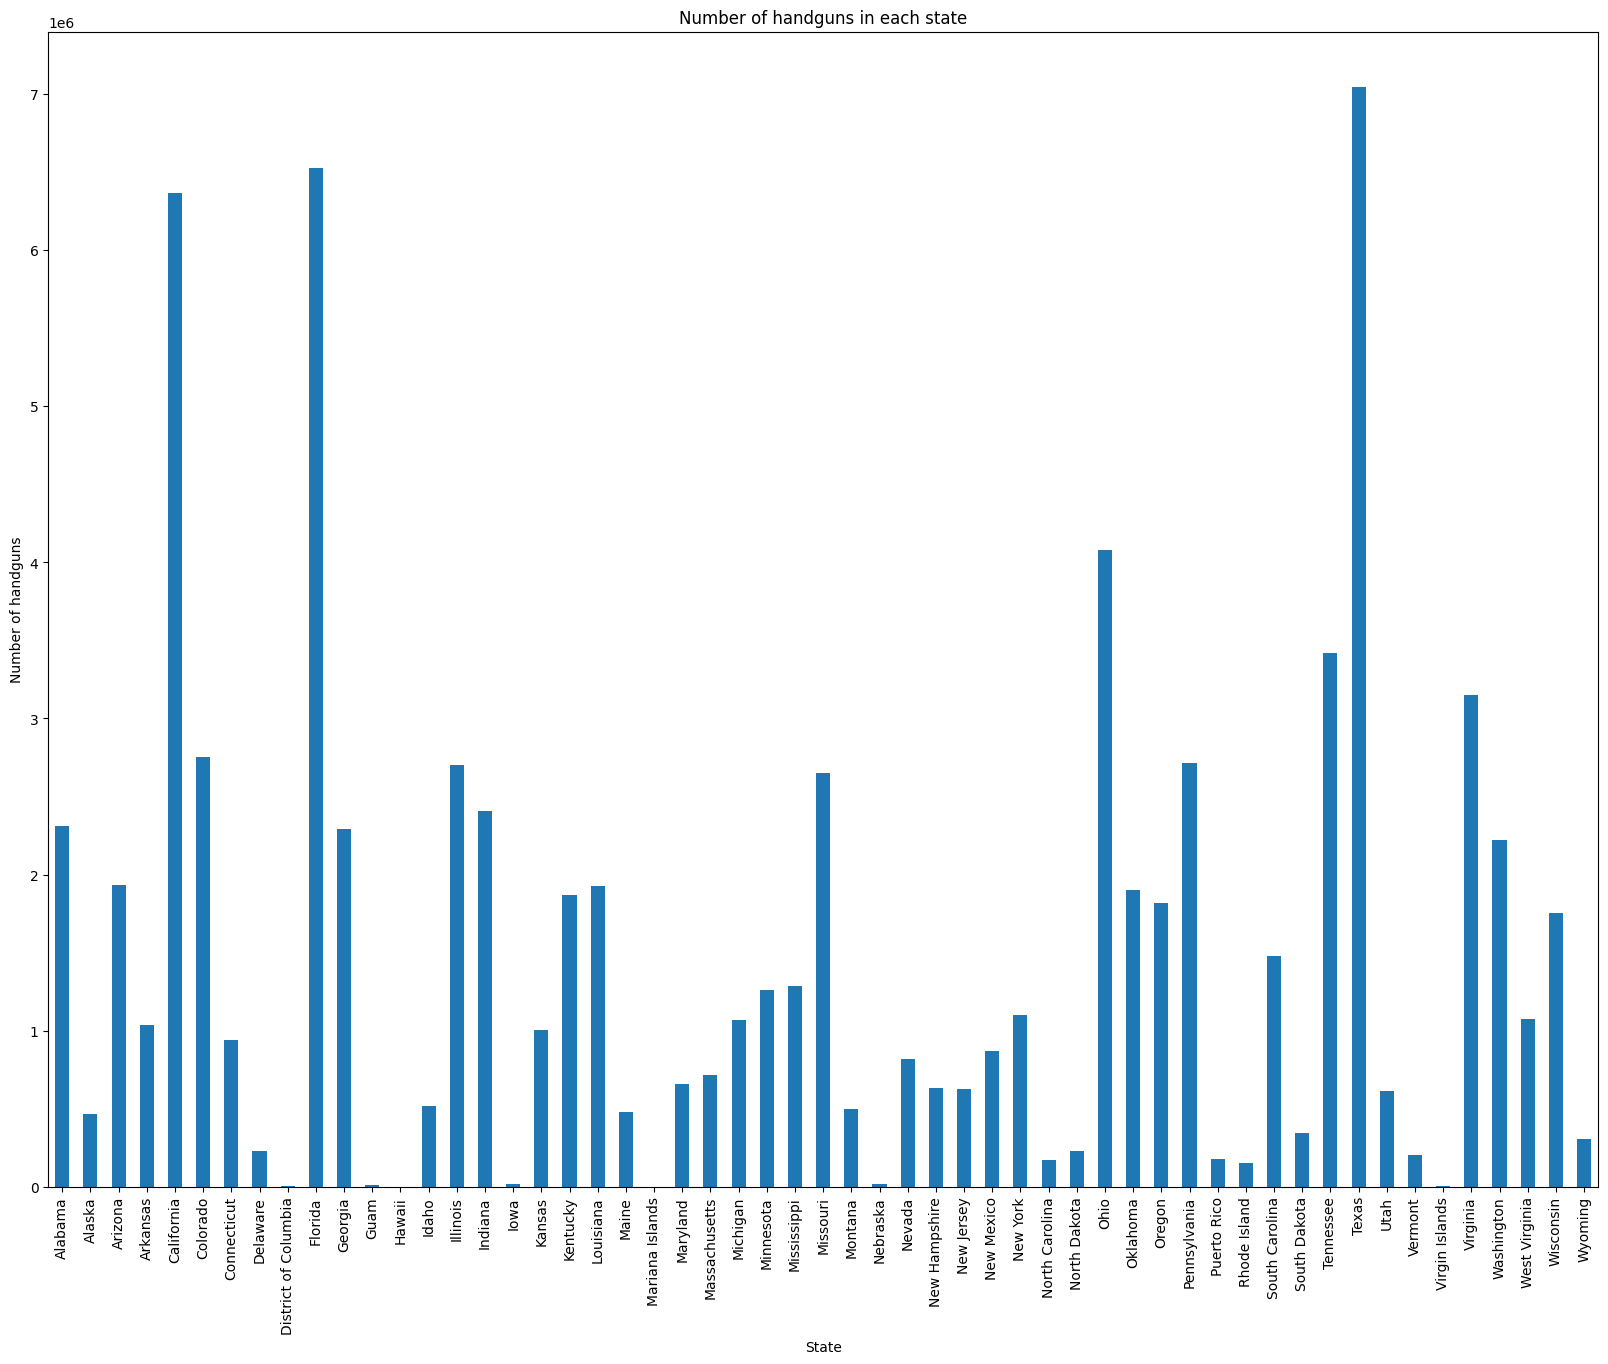

In [37]:
#Filter and group the graph data
permit_data=nics_data.groupby(['state'])['handgun'].sum()
permit_data.plot(kind='bar', title='Number of handguns in each state', ylabel='Number of handguns', xlabel='State', figsize=(20, 15))

Another common gun in the US is the long gun. We'll look on its distrubution cross the states.

To summarize the exploration on the variables we'll do a correlation matrix that tells us how each attribute is related to each other. This will help us in choosing our attributes and doing our analysis in the coming phases of this research

Is there a relationship between the number of guns owned by citizens and the number and location of shooting incidents?

 It is important to note that the NICS data does not directly represent the number of guns owned, but rather the number of background checks conducted for firearm-related transactions. However, it is commonly used as an approximate measure of firearms purchasing activity.

In [17]:
import pandas as pd

# Load the datasets
shooting_data = pd.read_excel('/Users/shrunkhala/Downloads/US_Mass_shooting_data_2014_2023_updated.xlsx')
nics_data = pd.read_csv('/Users/shrunkhala/Downloads/nics.csv')

# Display the first few rows of each dataset to understand their structures
shooting_data_head = shooting_data.head()
nics_data_head = nics_data.head()

(shooting_data_head, nics_data_head)


(  incident_date           state          city                  address  \
 0    2023-12-31      California     Hawthorne      14125 Crenshaw Blvd   
 1    2023-12-31  South Carolina  Little River             3389 Hwy 9 E   
 2    2023-12-31  North Carolina     Charlotte          300 S Church St   
 3    2023-12-30        Colorado        Denver        4888 W Colfax Ave   
 4    2023-12-30           Texas      Beaumont  6500 block of Bigner Rd   
 
    victims_killed  victims_injured  suspects_killed  suspects_injured  \
 0               1                5                0                 0   
 1               2                2                0                 0   
 2               0                5                0                 0   
 3               2                2                0                 0   
 4               1                4                0                 0   
 
    suspects_arrested  
 0                  0  
 1                  0  
 2                  1  
 3    

In [18]:
#Aggregate and summarizing the dataset

from datetime import datetime

# Aggregate and summarize shooting data
shooting_summary = shooting_data.groupby('state').agg({
    'victims_killed': 'sum',
    'victims_injured': 'sum',
    'incident_date': 'count'
}).rename(columns={'incident_date': 'total_incidents'})

# Convert month to datetime in NICS data for aggregation
nics_data['month'] = pd.to_datetime(nics_data['month'])
# Aggregate NICS data by state over the entire period
nics_summary = nics_data.groupby('state').agg({
    'handgun': 'sum',
    'long_gun': 'sum',
    'other': 'sum',
    'totals': 'sum'  # 'totals' includes all types of checks
})

# Merge the datasets based on state names
combined_data = shooting_summary.merge(nics_summary, how='left', left_index=True, right_index=True)

# Filter out entries that don't have corresponding data in both datasets
combined_data = combined_data.dropna()

combined_data.head()



,victims_killed,victims_injured,total_incidents,handgun,long_gun,other,totals
state,,,,,,,
Alabama,118,469,114,2310101.0,2712599.0,43219.0,7184104
Alaska,6,18,5,468058.0,605278.0,19276.0,1218677
Arizona,72,208,53,1933192.0,1577495.0,71544.0,4816709
Arkansas,52,245,54,1034759.0,1739605.0,16583.0,4006498
California,473,1641,420,6366179.0,6258115.0,388444.0,20395757


The combined dataset now includes aggregated information from both the mass shooting incidents and NICS firearm background checks by state. Specifically, it contains the total number of victims killed and injured, the total number of shooting incidents, and the summed values of handguns, long guns, other types of firearms, and total background checks (as a proxy for gun-related transactions) for each state

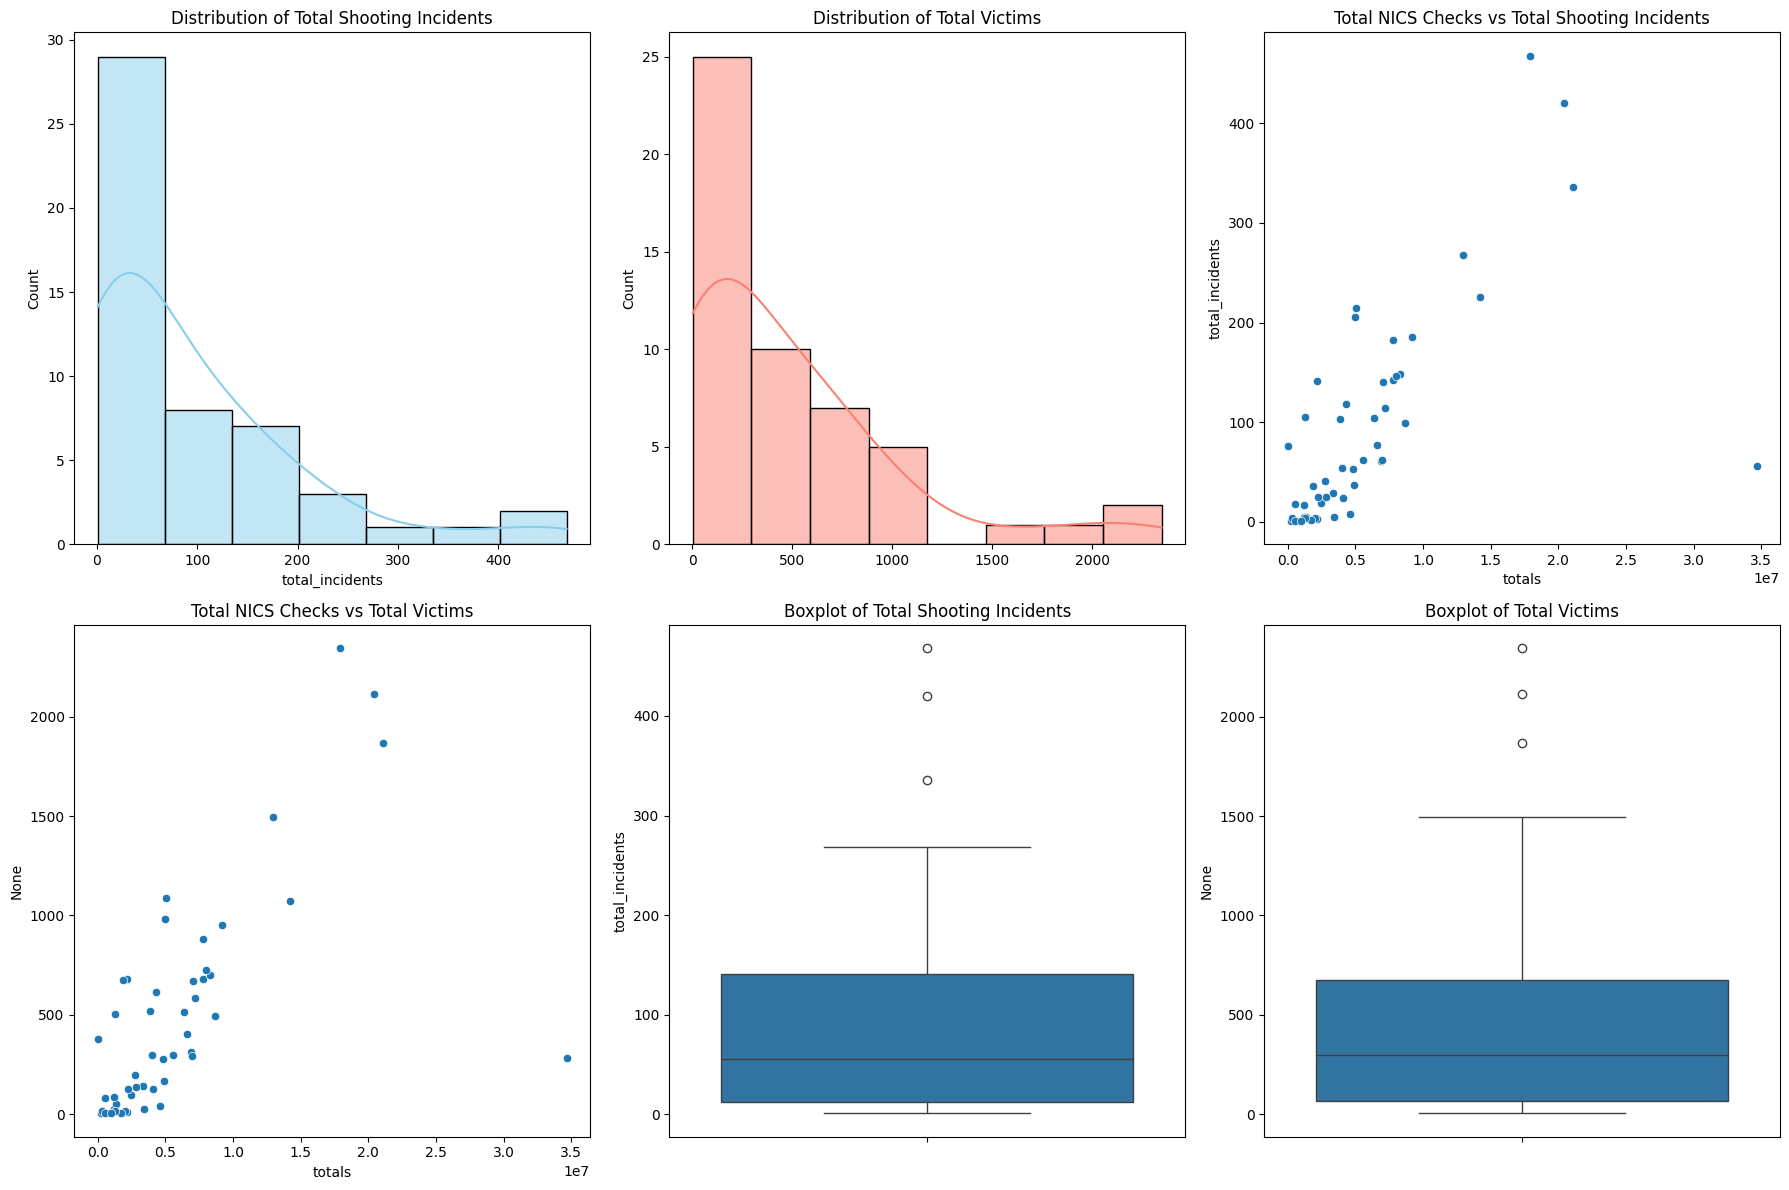

In [20]:
#EDA on aggregated data#

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size and grid for multiple plots
plt.figure(figsize=(18, 12))

# Histogram of total incidents
plt.subplot(2, 3, 1)
sns.histplot(combined_data['total_incidents'], kde=True, color='skyblue')
plt.title('Distribution of Total Shooting Incidents')

# Histogram of total victims
plt.subplot(2, 3, 2)
sns.histplot(combined_data['victims_killed'] + combined_data['victims_injured'], kde=True, color='salmon')
plt.title('Distribution of Total Victims')

# Scatter plot of Total NICS checks vs Total Incidents
plt.subplot(2, 3, 3)
sns.scatterplot(x='totals', y='total_incidents', data=combined_data)
plt.title('Total NICS Checks vs Total Shooting Incidents')

# Scatter plot of Total NICS checks vs Total Victims
plt.subplot(2, 3, 4)
sns.scatterplot(x='totals', y=combined_data['victims_killed'] + combined_data['victims_injured'], data=combined_data)
plt.title('Total NICS Checks vs Total Victims')

# Boxplot of total incidents by state
plt.subplot(2, 3, 5)
sns.boxplot(y='total_incidents', data=combined_data)
plt.title('Boxplot of Total Shooting Incidents')

# Boxplot of total victims by state
plt.subplot(2, 3, 6)
sns.boxplot(y=combined_data['victims_killed'] + combined_data['victims_injured'], data=combined_data)
plt.title('Boxplot of Total Victims')

plt.tight_layout()
plt.show()


**#Insights#**

**Distribution of Total Shooting Incidents:** Most states have a relatively low number of shooting incidents, as shown by the concentration of the histogram towards the lower end. However, there is a long tail, indicating that a few states have significantly higher numbers of incidents.

**Distribution of Total Victims:** Similarly to the incidents, most states have a lower number of total victims (killed and injured), but there are states with significantly higher totals, contributing to a long tail in the distribution.

**Total NICS Checks vs Total Shooting Incidents:** There is a positive relationship between the total number of NICS checks (a proxy for gun transactions) and the total number of shooting incidents. This suggests that higher levels of gun transactions may be associated with more shooting incidents, but remember, correlation does not imply causation.

**Total NICS Checks vs Total Victims:** Similar to the number of incidents, there's a positive relationship between NICS checks and the total number of victims. The more NICS checks, generally, the higher the total number of victims.

**Boxplot of Total Shooting Incidents:** The boxplot shows that the median number of shooting incidents across states is relatively low compared to the maximum, further highlighting the presence of outlier states with a high number of incidents.

**Boxplot of Total Victims:** This also shows a relatively low median compared to the maximum, indicating that while most states have a lower number of victims, there are outliers with significantly higher totals.

We can perform regression analysis to explore the relationship between gun transactions (using the total NICS checks as a proxy) and the number of shooting incidents. We'll look at different models:

Linear regression between total NICS checks and total shooting incidents.
Linear regression between total NICS checks and total victims (killed and injured)

In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for regression analysis
X = combined_data[['totals']]  # Predictor: Total NICS checks
Y_incidents = combined_data['total_incidents']  # Response: Total shooting incidents
Y_victims = combined_data['victims_killed'] + combined_data['victims_injured']  # Total victims

# Initialize linear regression models
model_incidents = LinearRegression()
model_victims = LinearRegression()

# Fit the models
model_incidents.fit(X, Y_incidents)
model_victims.fit(X, Y_victims)

# Get coefficients and intercepts
coef_incidents = model_incidents.coef_[0]
intercept_incidents = model_incidents.intercept_

coef_victims = model_victims.coef_[0]
intercept_victims = model_victims.intercept_

# Calculate R-squared values
r_squared_incidents = model_incidents.score(X, Y_incidents)
r_squared_victims = model_victims.score(X, Y_victims)

(coef_incidents, intercept_incidents, r_squared_incidents, coef_victims, intercept_victims, r_squared_victims)


(1.0806090315112136e-05,
 29.29760813251999,
 0.41681464659588463,
 5.496951456757698e-05,
 154.28804875151855,
 0.41306897858682223)

#Interpretations:

**Total NICS checks vs. Total Shooting Incidents:**

Coefficient (Slope): 0.0000108
Intercept: 29.30
R-squared: 0.417
This model suggests that there is a positive relationship between the total number of NICS checks (a proxy for gun transactions) and the total number of shooting incidents in a state. The R-squared value of 0.417 indicates that approximately 41.7% of the variation in the total number of shooting incidents can be explained by the variation in total NICS checks across states. However, it should be noted that correlation does not imply causation, and other factors not included in this model could be influencing both variables.

**Total NICS checks vs. Total Victims (Killed and Injured):**

Coefficient (Slope): 0.00005497
Intercept: 154.29
R-squared: 0.413
This model indicates a positive relationship between the total number of NICS checks and the total number of victims (both killed and injured) from shooting incidents. The R-squared value of 0.413 suggests that about 41.3% of the variation in the total number of shooting victims can be explained by the variation in total NICS checks across states.

These analyses suggest that there is a significant relationship between the estimated volume of gun transactions and the frequency and severity of shooting incidents, as indicated by the positive coefficients and substantial R-squared values. However, it's important to consider that these models are simplistic and do not account for other potentially influential factors such as state laws, socioeconomic conditions, or cultural differences. For a more comprehensive analysis, these factors should also be considered.

In [6]:
#Alternate method

# Read the data
mass_shootings_df = pd.read_excel('/Users/shrunkhala/Downloads/US_Mass_shooting_data_2014_2023_updated.xlsx')
nics_df = pd.read_csv('/Users/shrunkhala/Downloads/nics.csv')

# Convert 'month' in NICS data and 'incident_date' in shootings data to datetime
nics_df['month'] = pd.to_datetime(nics_df['month'])
mass_shootings_df['incident_date'] = pd.to_datetime(mass_shootings_df['incident_date'])

# Extract year from 'month' and 'incident_date' for aggregation
nics_df['year'] = nics_df['month'].dt.year
mass_shootings_df['year'] = mass_shootings_df['incident_date'].dt.year

# Aggregating NICS data by state and year
nics_aggregated = nics_df.groupby(['state', 'year'])['totals'].sum().reset_index()

# Aggregating mass shootings data by state and year
# For shootings, we are interested in the number of incidents and the total number of victims (killed and injured)
mass_shootings_aggregated = mass_shootings_df.groupby(['state', 'year']).agg(
    number_of_incidents=('state', 'size'),
    total_victims_killed=('victims_killed', 'sum'),
    total_victims_injured=('victims_injured', 'sum')
).reset_index()

# Displaying the first few rows of the aggregated data
(nics_aggregated.head(), mass_shootings_aggregated.head())




,state,year,number_of_incidents,total_victims_killed,total_victims_injured,totals
0,Alabama,2014,2,1,9,621305
1,Alabama,2015,4,4,13,737509
2,Alabama,2016,15,15,53,616947
3,Alabama,2017,7,6,38,477345
4,Alabama,2018,14,11,53,337443


In [7]:
#Correlation analysis

# Merging the two datasets on 'state' and 'year'
merged_data = pd.merge(mass_shootings_aggregated, nics_aggregated, on=['state', 'year'], how='inner')

# Display the first few rows of the merged dataset
merged_data.head()

,state,year,number_of_incidents,total_victims_killed,total_victims_injured,totals
0,Alabama,2014,2,1,9,621305
1,Alabama,2015,4,4,13,737509
2,Alabama,2016,15,15,53,616947
3,Alabama,2017,7,6,38,477345
4,Alabama,2018,14,11,53,337443


In [8]:
# Correlation analysis
correlation_matrix = merged_data[['number_of_incidents', 'total_victims_killed', 'total_victims_injured', 'totals']].corr()

correlation_matrix


,number_of_incidents,total_victims_killed,total_victims_injured,totals
number_of_incidents,1.000000,0.754341,0.735695,0.455112
total_victims_killed,0.754341,1.000000,0.811262,0.367391
total_victims_injured,0.735695,0.811262,1.000000,0.328939
totals,0.455112,0.367391,0.328939,1.000000


**Interpretations:**

Number of Incidents and NICS Checks (Totals): From the output results it seems that there is a moderate positive correlation of approximately 0.455, suggesting that states with more NICS checks, which can be considered as a proxy for higher levels of gun ownership, tend to have a higher number of shooting incidents, although the relationship is not extremely strong.

Total Victims Killed and NICS Checks (Totals): The correlation coefficient is around 0.367, indicating a weaker positive relationship between the total number of victims killed in shootings and the number of NICS checks.

Total Victims Injured and NICS Checks (Totals): This shows a correlation of approximately 0.329, which is also a positive but weaker relationship compared to the number of incidents.

These correlations suggest there is  relationship between the number of NICS checks (a proxy for gun ownership) and the number and severity of shooting incidents, although it's not a one-to-one correspondence. Other factors likely also play significant roles in the occurrence and severity of mass shootings.

4. **Can we predict the likelihood of increased gun sales in a region based on historical sales data, demographic factors, and recent incidents of gun violence? (Used Random Forest to answer)**

In [3]:
import pandas as pd

# Load the dataset from an Excel file
# Replace 'nics.xlsx' with your actual Excel file name
data = pd.read_excel('/Users/delapaz/Downloads/nics.xlsx')

# Ensure the 'month' column is in a datetime format and sort the data given the 'month' 
# column entries are in 'yyyy-mm' format as string
data['month'] = pd.to_datetime(data['month'], format='%Y-%m')
data.sort_values(by=['state', 'month'], inplace=True)

# Calculate the month-over-month percentage change in total sales for guns in each state
data['sales_change'] = data.groupby('state')['totals'].pct_change()

# Create a binary column where 1 represents an increase in gun sales (positive change)
data['increase_indicator'] = (data['sales_change'] > 0).astype(int)

# The dataset now has a new column 'increase_indicator' that you can use as your target variable

In [4]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Corrected import for SimpleImputer

# Loading the dataset from a locally saved Excel file
data = pd.read_excel('/Users/delapaz/Downloads/nics.xlsx')

# Converting the 'month' column to datetime format and sort the data by 'state' and 'month'
data['month'] = pd.to_datetime(data['month'], format='%Y-%m')
data.sort_values(by=['state', 'month'], inplace=True)

# Calculate the month-over-month percentage change in total sales for each state
# to create a new feature to capture trends in gun sales
data['sales_change'] = data.groupby('state')['totals'].pct_change()

# Create a binary indicator for whether there was an increase in sales compared to the previous month
data['increase_indicator'] = (data['sales_change'] > 0).astype(int)

# Selecting predictors for the model
predictors = data.drop(columns=['month', 'state', 'sales_change', 'increase_indicator', 'totals'])
outcome = data['increase_indicator']

# Replacing missing values in predictors with the median value of each column
imputer = SimpleImputer(strategy='median')
predictors_imputed = imputer.fit_transform(predictors)

# Split the data into training and testing sets for model validation
X_train, X_test, y_train, y_test = train_test_split(predictors_imputed, outcome, test_size=0.2, random_state=42)

# Standardize the features to have a mean of 0 and a variance of 1 to improves model performance 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run the Random Forest Classifier and train it on the scaled training data
sales_forecast_model = RandomForestClassifier(n_estimators=100, random_state=42)
sales_forecast_model.fit(X_train_scaled, y_train)

# Use the trained model to make predictions on the test set
predicted_sales_increase = sales_forecast_model.predict(X_test_scaled)

# Evaluate the accuracy of the model in predicting increased gun sales
model_accuracy = accuracy_score(y_test, predicted_sales_increase)
print(f"Model accuracy: {model_accuracy:.2f}")

# Analyze the importance of each feature in the prediction process
# to identify which features are most influential in predicting an increase in gun sales
feature_importances = pd.DataFrame(sales_forecast_model.feature_importances_,
                                   index=pd.DataFrame(predictors).columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature importances:\n", feature_importances)


Model accuracy: 0.66
Feature importances:
                            importance
long_gun                     0.205064
handgun                      0.163255
multiple                     0.124136
permit                       0.113966
redemption_long_gun          0.085023
redemption_handgun           0.063778
other                        0.057000
prepawn_long_gun             0.041968
admin                        0.037048
prepawn_handgun              0.033005
redemption_other             0.014625
returned_handgun             0.011410
returned_long_gun            0.008710
private_sale_long_gun        0.008581
private_sale_handgun         0.008011
permit_recheck               0.004858
private_sale_other           0.004348
prepawn_other                0.004043
returned_other               0.003580
return_to_seller_long_gun    0.003216
return_to_seller_handgun     0.002567
return_to_seller_other       0.001211
rentals_handgun              0.000361
rentals_long_gun             0.000236


In [5]:
from sklearn.metrics import mean_squared_error

# Compute the Mean Squared Error (MSE) of the model
mse = mean_squared_error(y_test, predicted_sales_increase)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.34


The accuracy of our Random Forest model is 66%, which means that it can correctly predict increases in gun sales over half the time when tested. The Mean Squared Error (MSE) is 0.34, which means there are some predictive inaccuracies. This discrepancy could stem from model limitations or the complexity of the data patterns.

Looking at the results, we see that sales of long guns and handguns are the leading indicators driving predictions. These two variables have the most weight in influencing the model's decision-making process. The other variables contribute less to predictions, which could be a result of having a weaker association with the target variable or redundant information that's already captured by more dominant features.

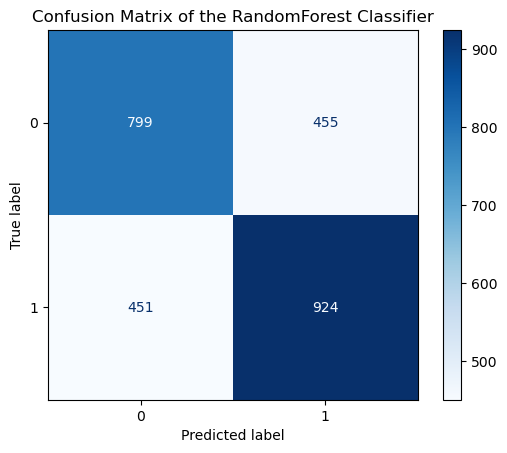

Model accuracy: 0.66
Mean Squared Error: 0.34


In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_sales_increase)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)  # You can specify other color maps
plt.title('Confusion Matrix of the RandomForest Classifier')
plt.show()

# Your previous calculations for model accuracy and MSE
print(f"Model accuracy: {model_accuracy:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


The visualization is called a confusion matrix, which is a tool used in machine learning to understand how well a classification model is performing. Our Random Forest Classifier, which should predict whether gun sales will increase, matrix breaks down the results into four parts:

- **Top Left (799)**: These are the True Negatives (TN). This is the amount of times our model correctly predicted 'no increase' in gun sales.
- **Bottom Right (924)**: These are the True Positives (TP). This is the amount of times our model correctly predicted an 'increase' in gun sales.
- **Top Right (455)**: These are the False Positives (FP). This is the amount of times our model incorrectly predicted 'increase' when there was no actual increase.
- **Bottom Left (451)**: These are the False Negatives (FN). This is the amount of times our model missed predicting an 'increase' that did actually happen.

The accuracy, noted at the bottom as 0.66, tells us that 66% of the model’s predictions are correct when combining True Positives and True Negatives. The Mean Squared Error (MSE) of 0.34 is another performance measure that tells us that on average, the square of the error or the difference between predicted values and actual values is 0.34, where 0 would mean no error at all. This gives us an idea of how much the model's predictions deviate from the actual numbers. 

From this confusion matrix, we can conclulde that the model is moderately accurate in its predictions, but there’s still a large amount of error and that there's room for improvement.

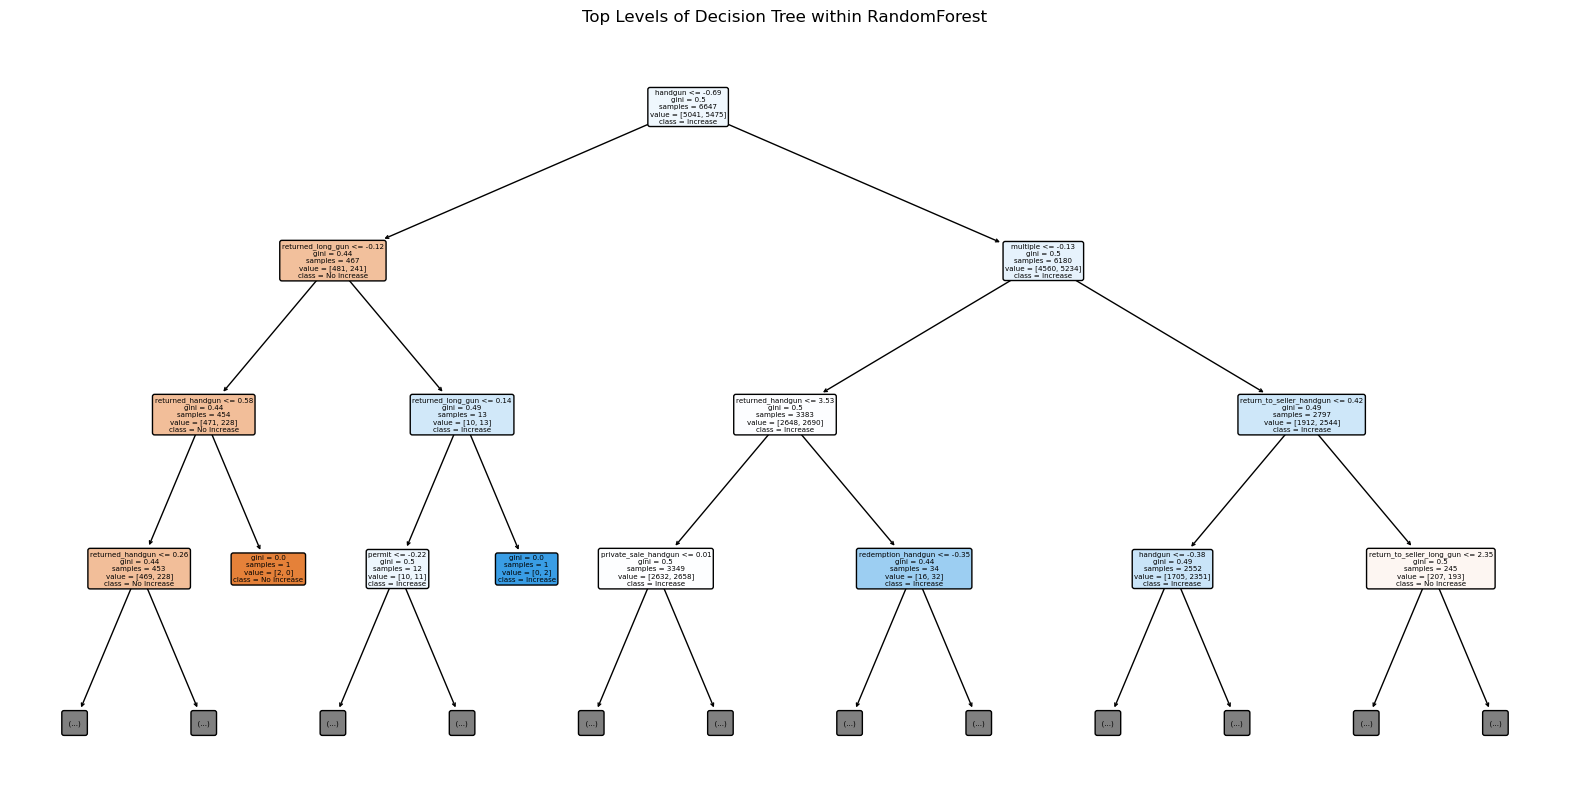

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# I chose one of the trees from random forest since there are many branches
estimator = sales_forecast_model.estimators_[0]

# I convert feature names from pandas.Index to list
feature_names_list = predictors.columns.tolist()

# Visualize only the top three levels of the tree
plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, feature_names=feature_names_list,
          class_names=['No Increase', 'Increase'], 
          rounded=True, proportion=False, precision=2, max_depth=3)

# Display the plot with a title
plt.title('Top Levels of Decision Tree within RandomForest')
plt.show()


This tree plot is somewhat like following a flowchart that shows how a decision is made. This particular tree is a part of a larger Random Forest model, which uses many trees to make a final prediction, but this tree gives me an idea of the process, showing only the top three levels of the tree.

At the very top, there’s a question about a specific feature, in this model it’s about the number of 'handguns' sold—and depending on the answer, the tree branches out. If the condition is met (for example, if the number of handguns sold is above a certain threshold), you follow the branch to the right, but if not, you go left. Each subsequent box or "node" asks another question until you reach the end of the branches, or the "leaves," which give the final prediction. For our model it is determining an increase or no increase in gun sales.

Each box shows me the condition being checked and some numbers like 'samples', 'value', and 'class'. 'Samples' tell me how many data points are being considered at that point, 'value' shows how many of those points are in each category, and 'class' indicates the prediction at that node. So as I follow the branches down, I'm seeing the model's thought process based on the data it's learned from. 

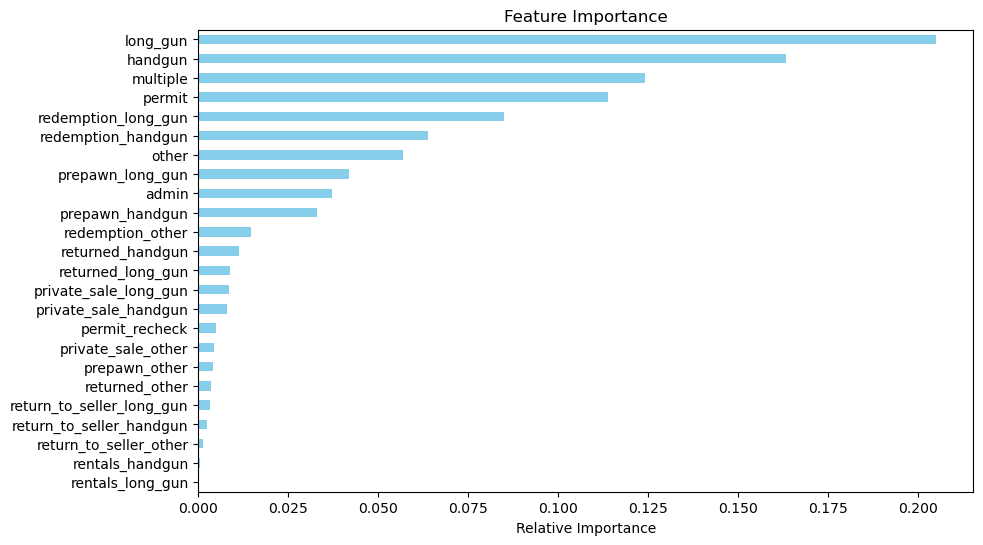

In [8]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values('importance', ascending=True, inplace=True)
feature_importances['importance'].plot(kind='barh', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.show()

This bar chart, known as a feature importance plot, shows which factors the Random Forest model finds most critical when predicting if gun sales will go up. Each bar represents a different factor. The longer the bar, the more it matters for the prediction. 

The factor 'long_gun' has the longest bar, which tells us that the number of long guns sold is the top influencer in the model's predictions about gun sales increases. 'Handgun' sales also seem quite important, but less than 'long_gun' sales. The short bars at the bottom, such as 'rentals_long_gun', don't have much influence on this model's predictions. 

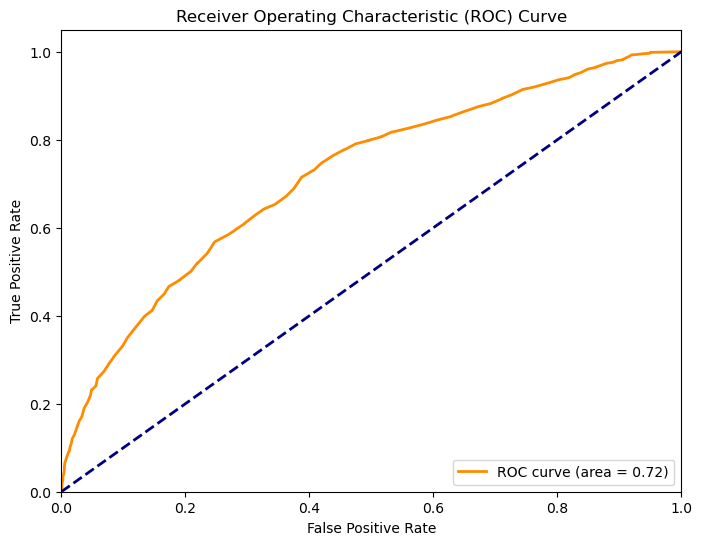

In [9]:
from sklearn.metrics import roc_curve, auc

# Get model predictions as probabilities
y_pred_probs = sales_forecast_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


This graph is called a Receiver Operating Characteristic, or ROC curve, and it's a way to see how well a model can tell two things apart. In this model, the ROC curve tells us whether gun sales are likely to increase or not. The curve shows the trade-off between correctly predicting an increase (the True Positive Rate on the y-axis) against incorrectly predicting an increase when there isn't one (the False Positive Rate on the x-axis).

The orange line shows the model's performance at various thresholds, and the dashed blue line represents a random guess. A perfect model would go straight up the left side and then along the top edge, meaning it correctly predicts all increases without any false positives.

The area under the ROC curve (AUC) is a score that tells us overall how good the model is. Here, the AUC is 0.72, which is better than a random guess (an AUC of 0.5) but not perfect. The model has learned something about what predicts an increase in gun sales, but there's still a need for it to get better at distinguishing the difference between the model's performance and the random guess.